In [12]:
import unicodedata
import re
def clean_text(doc):
    """
    Limpia y normaliza texto: conversión a minúsculas y eliminación de caracteres no alfabéticos.
    ### Input:
             doc: string
    ### Output:
             doc: string

    """
    doc = unicodedata.normalize('NFKD', doc).encode('ascii', 'ignore').decode('utf-8').lower()
    
    doc = re.sub(r'[^a-z\s]', ' ', doc)
    
    doc = re.sub(r'\s+', ' ', doc).strip()
    
    return doc

In [13]:
from PIL import Image
import pandas as pd

path = '../data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv'
df = pd.read_csv(path)
path_ = '../data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'
df_ = pd.read_csv(path_)
path__ = '../data/1429_1.csv'
df__ = pd.read_csv(path__)

df_complete_dataset = pd.concat([df, df_, df__], ignore_index=True)
df_name_img = df_complete_dataset[['name', 'imageURLs']].drop_duplicates(subset='name').dropna(subset = 'imageURLs')
df_name_img['name'] = df_name_img['name'].apply(clean_text)
len(df_name_img)

C:\Users\Mauricio Morales\AppData\Local\Temp\ipykernel_5016\2793555672.py:9: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df__ = pd.read_csv(path__)


79

In [14]:
df_name_img

,name,imageURLs
0,amazon kindle e reader wifi th generation,https://pisces.bbystatic.com/image2/BestBuy_US...
96,amazon echo show alexa enabled bluetooth speak...,https://static.bhphoto.com/images/images500x50...
941,amazon fire tv with k ultra hd and alexa voice...,https://c1.neweggimages.com/NeweggImage/Produc...
945,amazon echo plus w built in hub silver,https://pisces.bbystatic.com/image2/BestBuy_US...
1535,amazon w powerfast official oem usb charger an...,http://pisces.bbystatic.com/image2/BestBuy_US/...
...,...,...
30864,certified refurbished amazon fire tv with alex...,https://www.upccodesearch.com/images/barcode/0...
30871,all new kindle oasis e reader high resolution ...,https://pisces.bbystatic.com/image2/BestBuy_US...
30878,amazonbasics bluetooth keyboard for android de...,http://ecx.images-amazon.com/images/I/41PnK8s8...
30884,amazon kindle replacement power adapter fits l...,https://images-na.ssl-images-amazon.com/images...


In [ ]:
import os

dir = '../data/img'
for name in df_name_img['name']:
    for fname in os.listdir(dir):
        if name in fname:
            print(fname)

fire kids edition tablet display wi fi gb blue kid proof case_1.jpg
fire kids edition tablet display wi fi gb blue kid proof case_2.jpg
fire kids edition tablet display wi fi gb blue kid proof case_4.jpg
fire kids edition tablet display wi fi gb blue kid proof case_6.jpg
fire kids edition tablet display wi fi gb blue kid proof case_7.jpg
fire kids edition tablet display wi fi gb blue kid proof case_8.jpg
fire kids edition tablet display wi fi gb blue kid proof case_9.jpg


In [15]:
import os
import pandas as pd

IMG_DIR = "../data/img"

rows = []

for img_file in os.listdir(IMG_DIR):
    if not img_file.endswith(".jpg"):
        continue

    # Separar el nombre del índice final _n.jpg
    caption = img_file.rsplit("_", 1)[0]

    rows.append({
        "image_path": os.path.join(IMG_DIR, img_file).replace('\\', '/'),
        "caption": caption
    })

df_img_caption = pd.DataFrame(rows)


In [2]:
import sys
from pathlib import Path

ROOT_DIR = Path().resolve().parent
sys.path.append(str(ROOT_DIR))

In [3]:
from src.loader_dataset import load_names, get_caption_by_image_name
from src.embeddings import get_text_embedding

[nltk_data] Downloading package stopwords to C:\Users\Mauricio
[nltk_data]     Morales\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\Mauricio Morales\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
paths = ['../data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv','../data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv','../data/1429_1.csv' ]
img_dir = '../data/img'

df = load_names(paths, img_dir)

C:\Users\Mauricio Morales\Documents\Universidad\2025b\RI\RI_ICCD753_PROJECT_BIM_2\src\loader_dataset.py:22: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_name_img = pd.concat([pd.read_csv(p) for p in csv_paths],ignore_index=True)


In [ ]:
embedding = get_text_embedding(df['caption'].to_list(), device = 'cuda')
print(embedding.shape)
embedding

In [5]:
df

,image_path,caption
0,../data/img/all new echo nd generation with im...,all new echo nd generation with improved sound...
1,../data/img/all new echo nd generation with im...,all new echo nd generation with improved sound...
2,../data/img/all new echo nd generation with im...,all new echo nd generation with improved sound...
3,../data/img/all new echo nd generation with im...,all new echo nd generation with improved sound...
4,../data/img/all new echo nd generation with im...,all new echo nd generation with improved sound...
...,...,...
372,../data/img/two door top load pet kennel trave...,two door top load pet kennel travel crate dog ...
373,../data/img/two door top load pet kennel trave...,two door top load pet kennel travel crate dog ...
374,../data/img/two door top load pet kennel trave...,two door top load pet kennel travel crate dog ...
375,../data/img/two door top load pet kennel trave...,two door top load pet kennel travel crate dog ...


In [4]:
import torch
import clip
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
model, preprocess = clip.load('ViT-B/32', device='cuda')
images = []
try:
    images = [
        preprocess(Image.open(p).convert("RGB")).unsqueeze(0).to('cuda') #cargamos el RGB
        for p in df['image_path']
    ]
except:
    pass
with torch.no_grad():
    image_embeddings = torch.cat([model.encode_image(img) for img in images]) #obtenemos los embedings

image_embeddings /= image_embeddings.norm(dim=-1, keepdim=True)

print("Embeddings de imágenes:", image_embeddings.shape)

Embeddings de imágenes: torch.Size([377, 512])


In [8]:
df['caption'].to_list()

['all new echo nd generation with improved sound powered by dolby and a new design walnut finish',
 'all new echo nd generation with improved sound powered by dolby and a new design walnut finish',
 'all new echo nd generation with improved sound powered by dolby and a new design walnut finish',
 'all new echo nd generation with improved sound powered by dolby and a new design walnut finish',
 'all new echo nd generation with improved sound powered by dolby and a new design walnut finish',
 'all new echo nd generation with improved sound powered by dolby and a new design walnut finish',
 'all new echo nd generation with improved sound powered by dolby and a new design walnut finish',
 'all new fire hd kids edition tablet hd display gb blue kid proof case',
 'all new fire hd kids edition tablet hd display gb blue kid proof case',
 'all new fire hd kids edition tablet hd display gb blue kid proof case',
 'all new fire hd kids edition tablet hd display gb pink kid proof case',
 'all new f

In [5]:
text_tokens = clip.tokenize(df['caption'].to_list()).to('cuda')

with torch.no_grad():
    text_embeddings = model.encode_text(text_tokens)

text_embeddings /= text_embeddings.norm(dim=-1, keepdim=True) #obtenemos el embeding de los textos

print("Embeddings de texto:", text_embeddings.shape)

Embeddings de texto: torch.Size([377, 512])


In [6]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(
    text_embeddings.cpu().numpy(),
    image_embeddings.cpu().numpy()
)

similarity

array([[0.26865834, 0.19636582, 0.317772  , ..., 0.23259702, 0.19541499,
        0.21032992],
       [0.26865834, 0.19636582, 0.317772  , ..., 0.23259702, 0.19541499,
        0.21032992],
       [0.26865834, 0.19636582, 0.317772  , ..., 0.23259702, 0.19541499,
        0.21032992],
       ...,
       [0.21222196, 0.11783045, 0.15529036, ..., 0.25726858, 0.22930004,
        0.20968341],
       [0.21222196, 0.11783045, 0.15529036, ..., 0.25726858, 0.22930004,
        0.20968341],
       [0.21222196, 0.11783045, 0.15529036, ..., 0.25726858, 0.22930004,
        0.20968341]], shape=(377, 377))

In [7]:
all_embeddings = torch.cat([image_embeddings, text_embeddings]).cpu().numpy()

pca = PCA(n_components=2, n_oversamples=12) # reducción de dimensiones
embeddings_2d_pca = pca.fit_transform(all_embeddings)

img_2d_pca = embeddings_2d_pca[:len(image_embeddings)]
txt_2d_pca = embeddings_2d_pca[len(image_embeddings):]

tsne = TSNE(n_components=2, perplexity=12, random_state=42) # reducción de dimensiones
embeddings_2d_tsne = tsne.fit_transform(all_embeddings)

img_2d_tsne = embeddings_2d_tsne[:len(image_embeddings)] 
txt_2d_tsne = embeddings_2d_tsne[len(image_embeddings):]

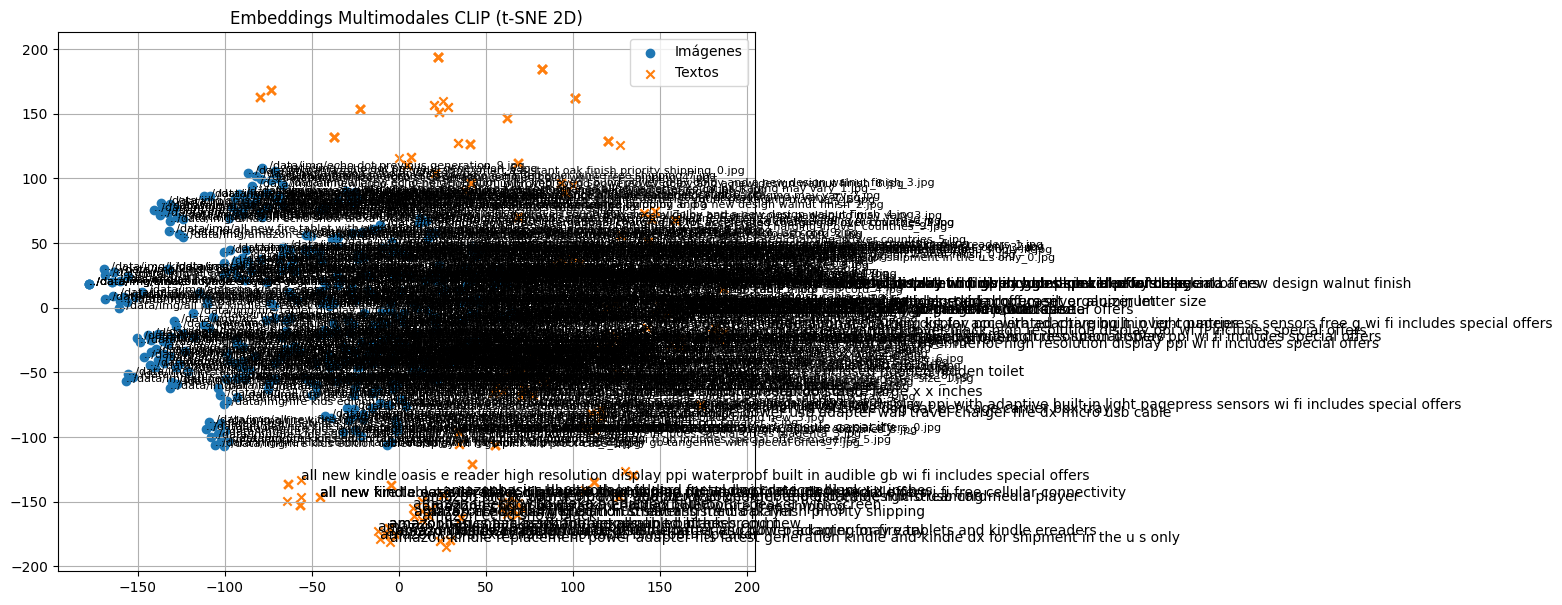

In [ ]:
plt.figure(figsize=(9,7))

plt.scatter(img_2d_tsne[:,0], img_2d_tsne[:,1], marker='o', label='Imágenes')
for i, name in enumerate(df['image_path']):
    plt.text(img_2d_tsne[i,0], img_2d_tsne[i,1], name, fontsize=8)

plt.scatter(txt_2d_tsne[:,0], txt_2d_tsne[:,1], marker='x', label='Textos')
for i, txt in enumerate(df['caption'].unique()):
    plt.text(txt_2d_tsne[i,0], txt_2d_tsne[i,1], txt, fontsize=10)

plt.title("Embeddings Multimodales CLIP (t-SNE 2D)")
plt.legend()
plt.grid(True)
plt.show()

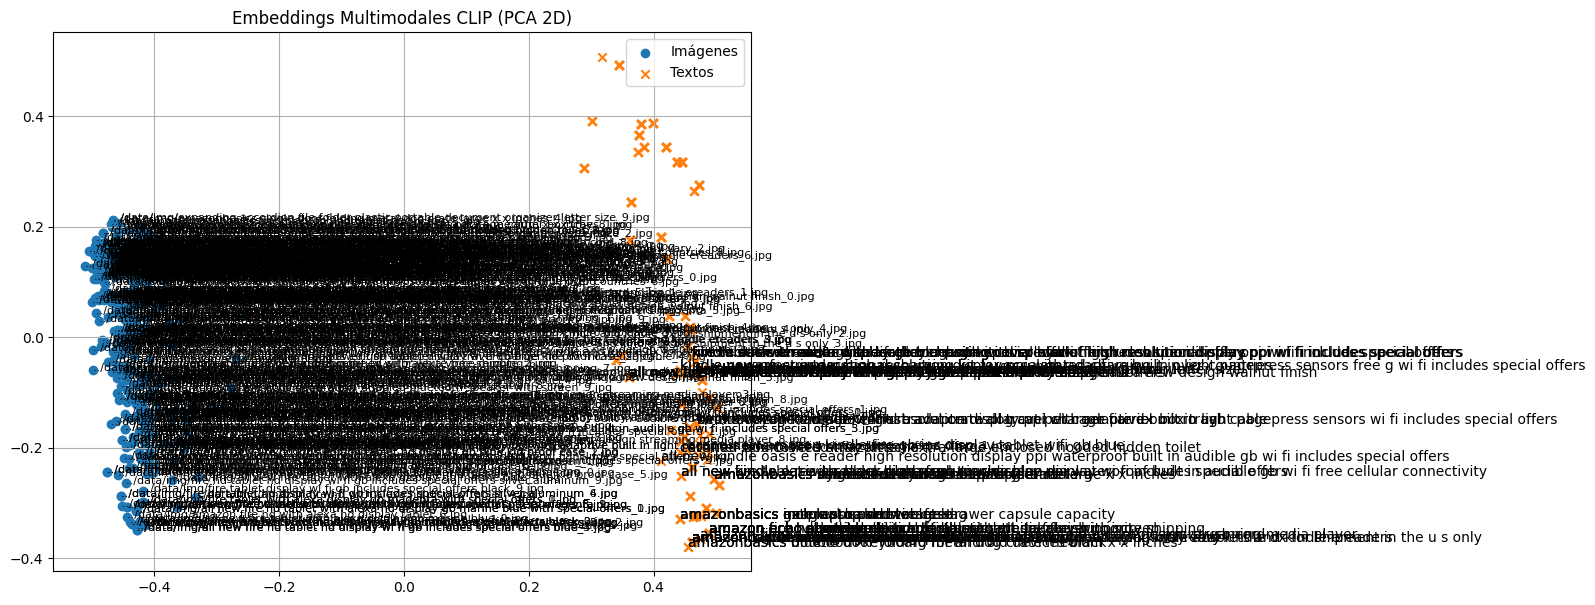

In [10]:
plt.figure(figsize=(9,7))

plt.scatter(img_2d_pca[:,0], img_2d_pca[:,1], marker='o', label='Imágenes')
for i, name in enumerate(df['image_path']):
    plt.text(img_2d_pca[i,0], img_2d_pca[i,1], name, fontsize=8)

plt.scatter(txt_2d_pca[:,0], txt_2d_pca[:,1], marker='x', label='Textos')
for i, txt in enumerate(df['caption'].unique()):
    plt.text(txt_2d_pca[i,0], txt_2d_pca[i,1], txt, fontsize=10)

plt.title("Embeddings Multimodales CLIP (PCA 2D)")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
def buscar_imagen(texto):
    token = clip.tokenize([texto]).to('cuda')

    with torch.no_grad():
        emb = model.encode_text(token)
        emb /= emb.norm(dim=-1, keepdim=True)

    scores = cosine_similarity(
        emb.cpu().numpy(),
        image_embeddings.cpu().numpy()
    )[0]

    idx = np.argmax(scores)

    print("Texto:", texto)
    print("Imagen más similar:", df['image_path'].iloc[idx])
    plt.imshow(Image.open(df['image_path'].iloc[idx]))
    plt.axis("off")
    plt.show()

def buscar_texto(nombre_imagen):
    img = preprocess(Image.open(nombre_imagen).convert("RGB")).unsqueeze(0).to('cuda')

    with torch.no_grad():
        emb = model.encode_image(img)
        emb /= emb.norm(dim=-1, keepdim=True)

    scores = cosine_similarity(
        emb.cpu().numpy(),
        text_embeddings.cpu().numpy()
    )[0]

    text_scores = zip(df['caption'].unique(), scores)
    text_scores = sorted(text_scores, key=lambda x: x[1], reverse=True)
    print(text_scores)

    idx = np.argmax(scores)

    print("Imagen:", nombre_imagen)
    print("Texto más cercano:", df['caption'].iloc[idx])
    plt.imshow(Image.open(nombre_imagen))
    plt.axis("off")
    plt.show()

Texto: firestick
Imagen más similar: ../data/img/all new echo nd generation with improved sound powered by dolby and a new design walnut finish_1.jpg


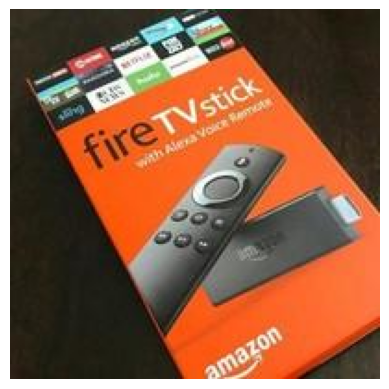

In [15]:
buscar_imagen("firestick")

[('fire tablet with alexa display gb blue with special offers', np.float64(0.27324384247271116)), ('fire tablet with alexa display gb magenta with special offers', np.float64(0.27324384247271116)), ('fire tv stick streaming media player pair kit', np.float64(0.27324384247271116)), ('kindle e reader white glare free touchscreen display wi fi includes special offers', np.float64(0.27324384247271116)), ('kindle oasis e reader with leather charging cover black high resolution display ppi wi fi includes special offers', np.float64(0.27324384247271116)), ('kindle oasis e reader with leather charging cover merlot high resolution display ppi wi fi includes special offers', np.float64(0.27324384247271116)), ('kindle oasis e reader with leather charging cover walnut high resolution display ppi wi fi includes special offers', np.float64(0.27324384247271116)), ('kindle powerfast international charging kit for accelerated charging in over countries', np.float64(0.2672111691057357)), ('kindle voyage

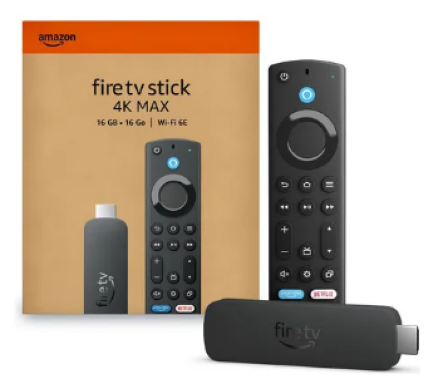

In [16]:
buscar_texto("test.png")

[('all new echo nd generation with improved sound powered by dolby and a new design walnut finish', np.float64(0.20146096004474054)), ('all new fire hd kids edition tablet hd display gb blue kid proof case', np.float64(0.20146096004474054)), ('all new fire hd kids edition tablet hd display gb pink kid proof case', np.float64(0.20146096004474054)), ('all new fire hd tablet hd display wi fi gb includes special offers black', np.float64(0.20146096004474054)), ('all new fire hd tablet hd display wi fi gb includes special offers blue', np.float64(0.20146096004474054)), ('all new fire hd tablet hd display wi fi gb includes special offers magenta', np.float64(0.20146096004474054)), ('all new fire hd tablet with alexa hd display gb marine blue with special offers', np.float64(0.20146096004474054)), ('fire tablet with alexa display gb blue with special offers', np.float64(0.17204045195243325)), ('fire tablet with alexa display gb magenta with special offers', np.float64(0.17204045195243325)), (

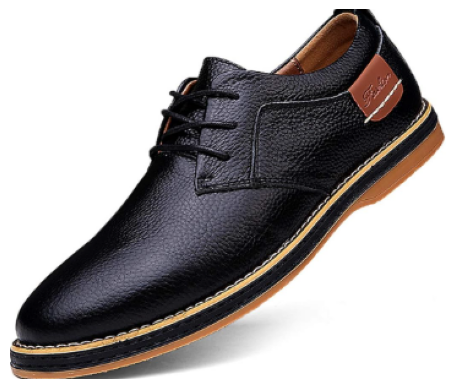

In [17]:
buscar_texto("test_2.png")

[('all new echo nd generation with improved sound powered by dolby and a new design walnut finish', np.float64(0.22784742201972663)), ('all new fire hd kids edition tablet hd display gb blue kid proof case', np.float64(0.22784742201972663)), ('all new fire hd kids edition tablet hd display gb pink kid proof case', np.float64(0.22784742201972663)), ('all new fire hd tablet hd display wi fi gb includes special offers black', np.float64(0.22784742201972663)), ('all new fire hd tablet hd display wi fi gb includes special offers blue', np.float64(0.22784742201972663)), ('all new fire hd tablet hd display wi fi gb includes special offers magenta', np.float64(0.22784742201972663)), ('all new fire hd tablet with alexa hd display gb marine blue with special offers', np.float64(0.22784742201972663)), ('kindle powerfast international charging kit for accelerated charging in over countries', np.float64(0.20326790771662906)), ('kindle voyage e reader high resolution display ppi with adaptive built 

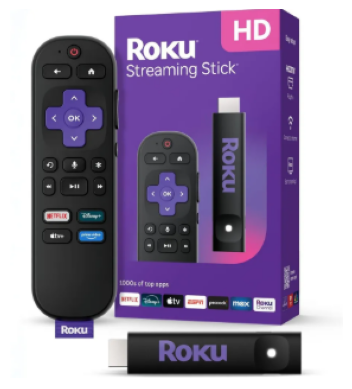

In [18]:
buscar_texto("test_3.png")